### Кластеризация и классификация стран

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, rand_score, calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [152]:
df = pd.read_csv('Country-data.csv')
countries = df['country']

## Определения:

country - название страны\
child_mort - Смертность детей до 5 лет на 1000 живорождений\
exports - экспорт товара и услуг на душу населения\
health - Общие расходы на здравоохранение на душу населения\
imports - Импорт товаров и услуг на душу населения\
income - доход на человека\
inflation - изменение годового темпа роста ВВП\
life_expec - сколько проживает новорожденный в среднем\
total_fer - сколько детей рожает в среднем одна женщина\
gdpp - ВВП на душу населения

## Работа с датасетом


In [153]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [155]:
missing_values = df.isnull().sum()

print(missing_values)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [156]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [157]:
X = df.drop(columns=['country'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

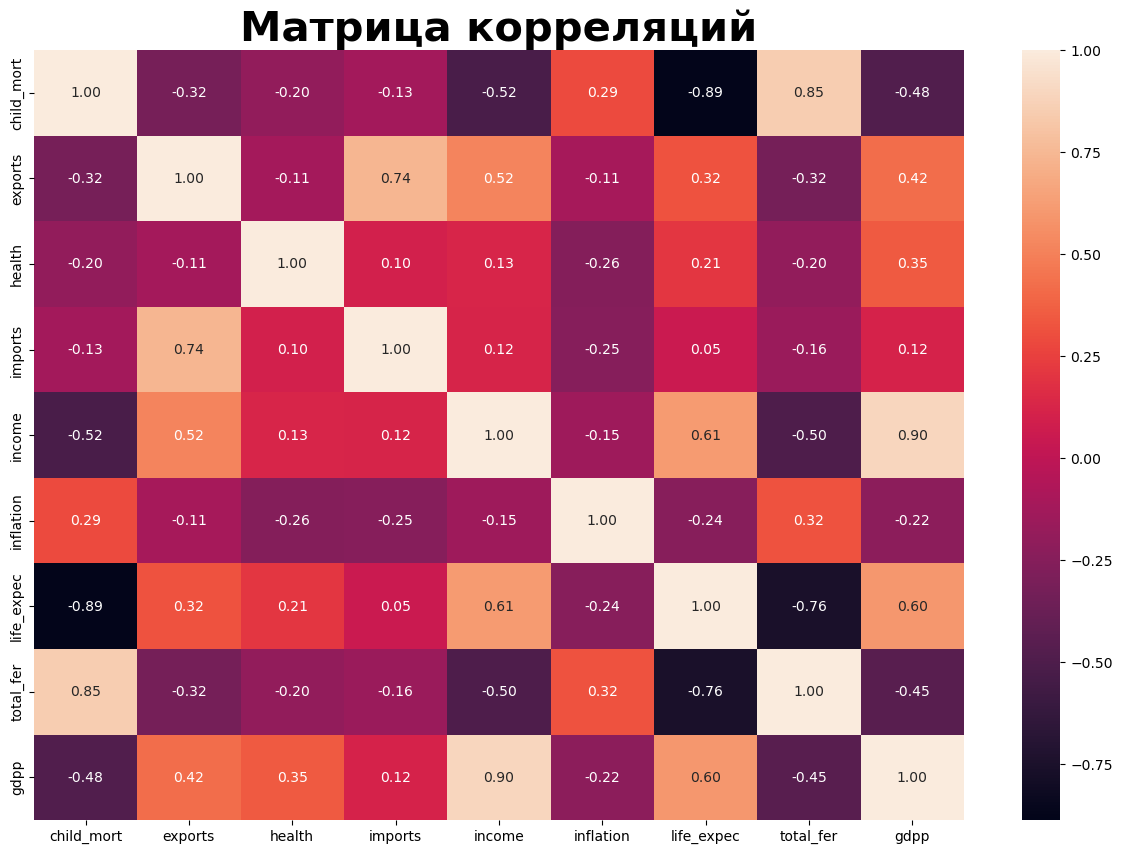

Данные после PCA с сохранением стран:
          PC1       PC2              country
0   -2.913025  0.095621          Afghanistan
1    0.429911 -0.588156              Albania
2   -0.285225 -0.455174              Algeria
3   -2.932423  1.695555               Angola
4    1.033576  0.136659  Antigua and Barbuda
..        ...       ...                  ...
162 -0.820631  0.639570              Vanuatu
163 -0.551036 -1.233886            Venezuela
164  0.498524  1.390744              Vietnam
165 -1.887451 -0.109453                Yemen
166 -2.864064  0.485998               Zambia

[167 rows x 3 columns]


In [159]:
corr  = df.drop('country',axis=1).corr()

fig = plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot = True, fmt='.2f')
plt.title('Матрица корреляций', fontsize = 30, fontweight = 'bold')
plt.show()

In [148]:
sns.pairplot(df[['country','child_mort','exports','health', 'imports', 'income', 'inflation']], hue = 'health')

In [87]:
X = df.drop('health',axis=1)
X.head()

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,2.13,12200


In [88]:
y = df['health']
y

0      7.58
1      6.55
2      4.17
3      2.85
4      6.03
       ... 
162    5.25
163    4.91
164    6.84
165    5.18
166    5.89
Name: health, Length: 167, dtype: float64

In [89]:
X = df.iloc[:, 2:6]
y = df.iloc[:, 0]

In [90]:
X

,exports,health,imports,income
0,10.0,7.58,44.9,1610
1,28.0,6.55,48.6,9930
2,38.4,4.17,31.4,12900
3,62.3,2.85,42.9,5900
4,45.5,6.03,58.9,19100
...,...,...,...,...
162,46.6,5.25,52.7,2950
163,28.5,4.91,17.6,16500
164,72.0,6.84,80.2,4490
165,30.0,5.18,34.4,4480


In [91]:
y

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [92]:
scores = []
values = np.arange(2, 10)

In [150]:
for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)
    


Number of clusters = 2
Silhouette score = 0.7256314906273206

Number of clusters = 3
Silhouette score = 0.7003508054481694

Number of clusters = 4
Silhouette score = 0.6109297437247547

Number of clusters = 5
Silhouette score = 0.573477344327287

Number of clusters = 6
Silhouette score = 0.5896533735024609

Number of clusters = 7
Silhouette score = 0.5959257331107111

Number of clusters = 8
Silhouette score = 0.5964827694227413

Number of clusters = 9
Silhouette score = 0.5539652251936875


NameError: name 'countries' is not defined


Optimal number of clusters = 2


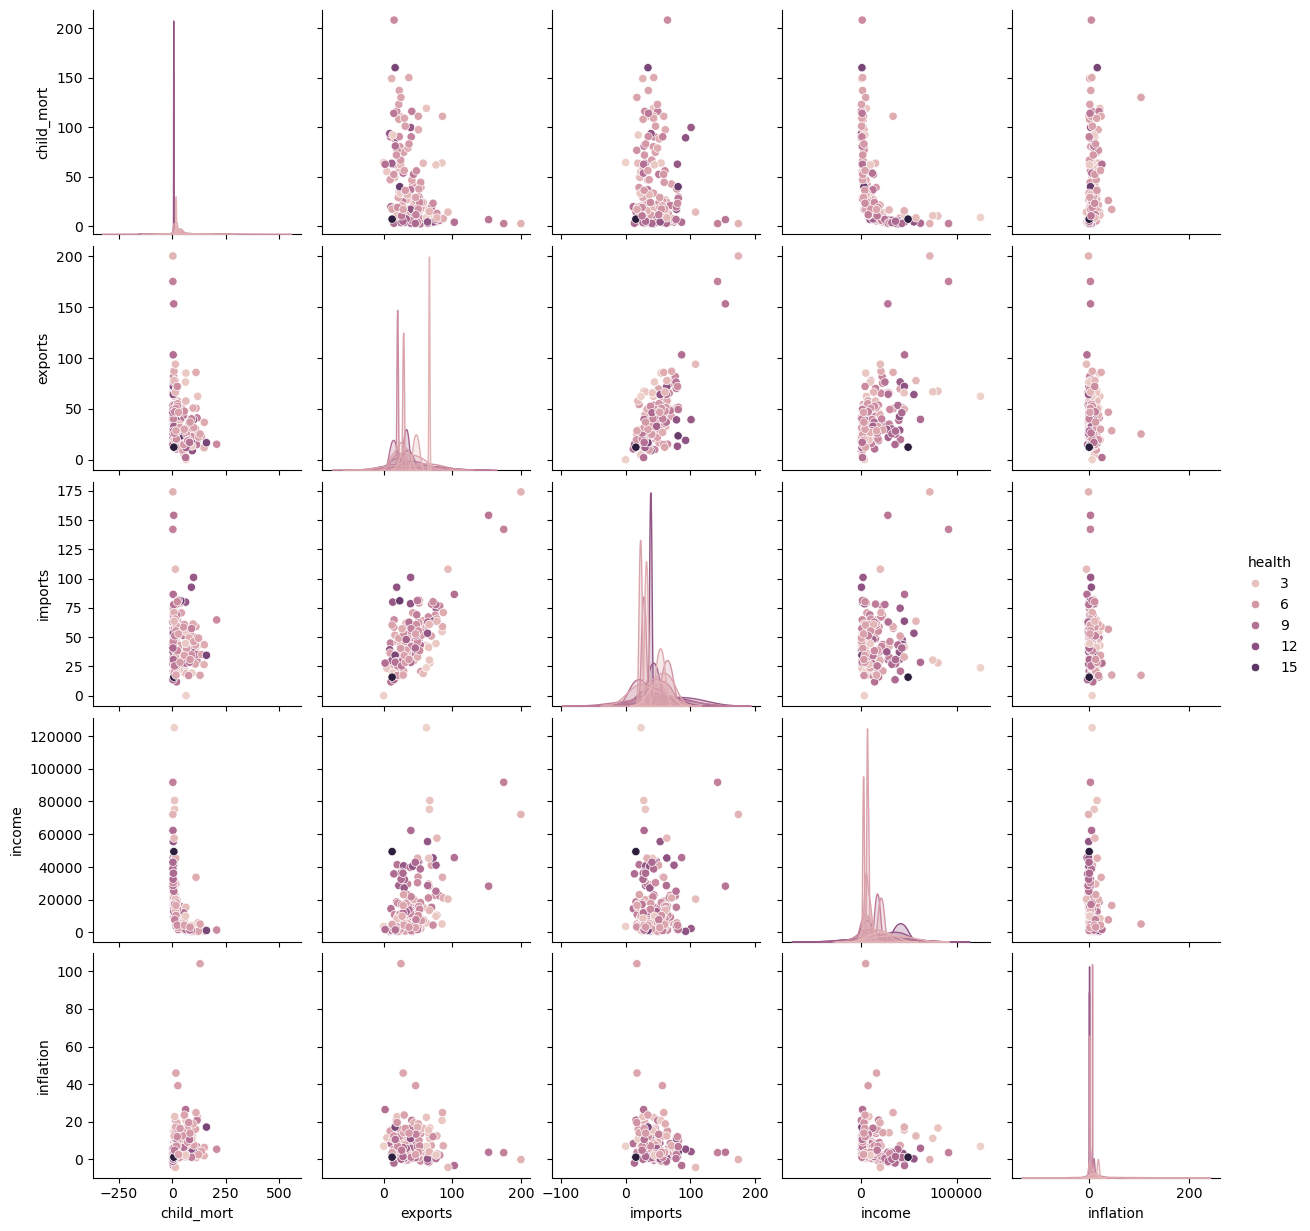

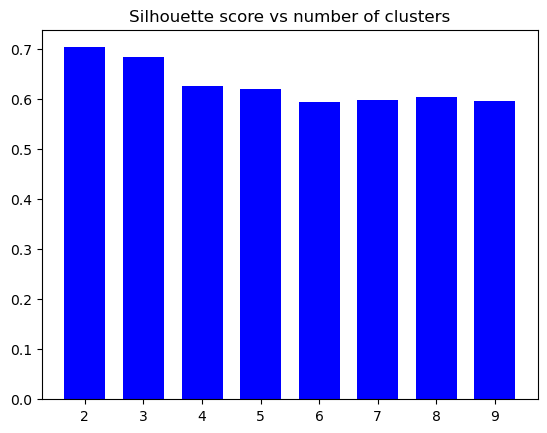

In [94]:
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

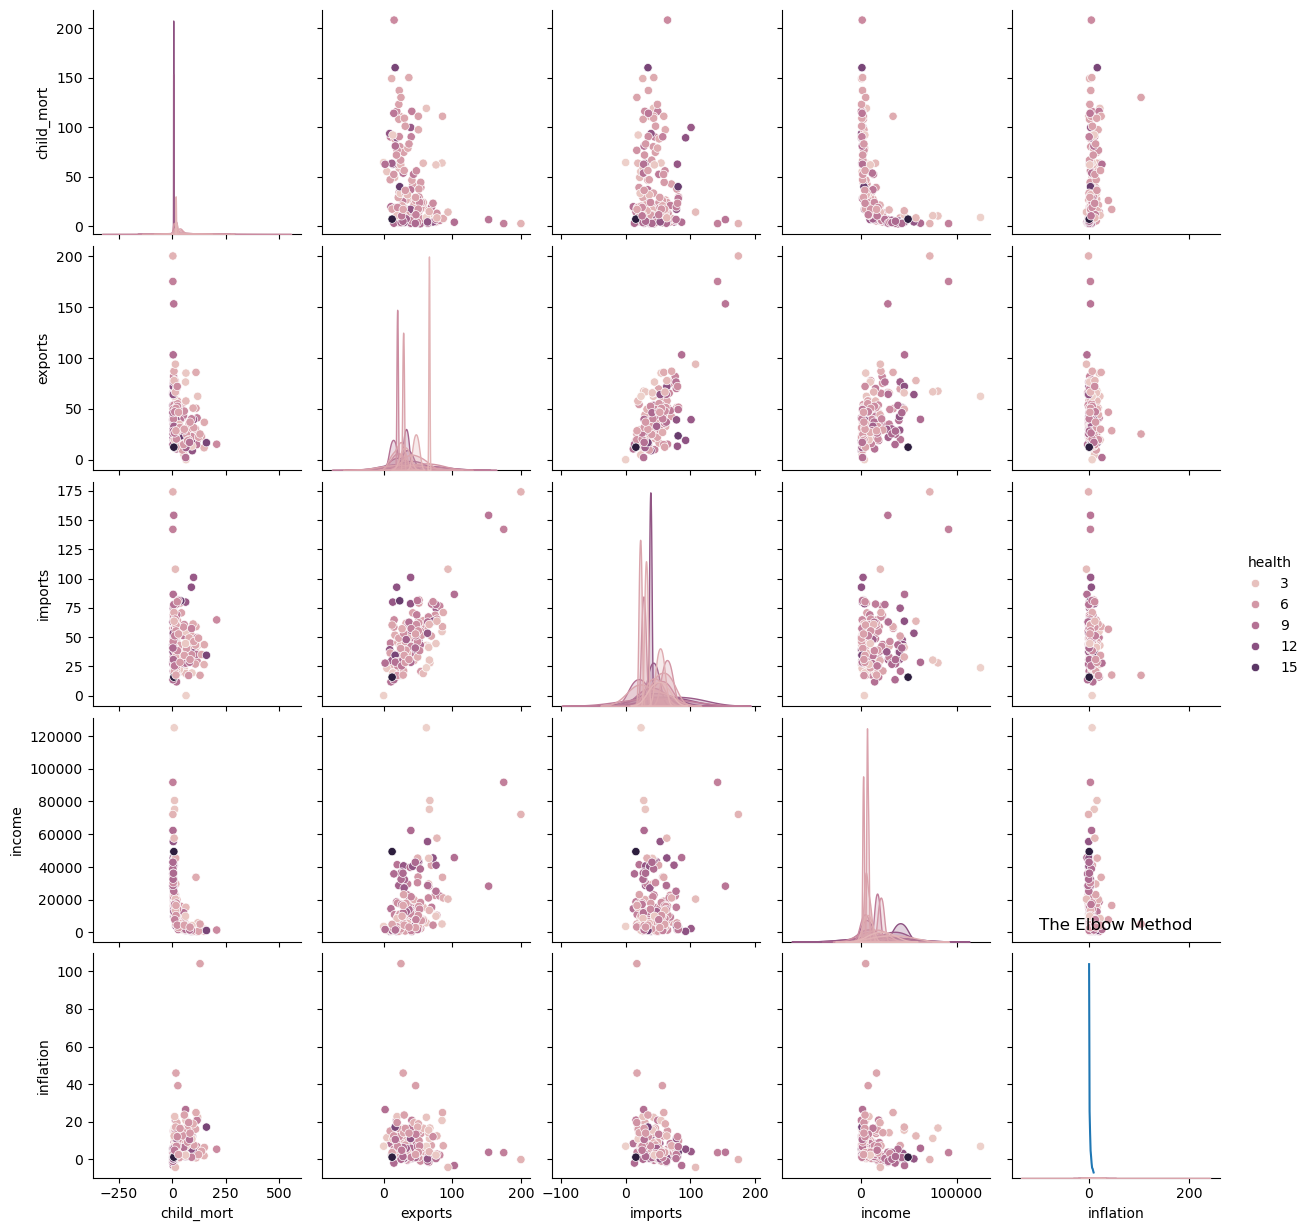

In [149]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Обучение кластеризации

In [96]:
def showMetric(X, metrica):
    ch_score = calinski_harabasz_score(X, metrica)
    sil_score = silhouette_score(X, metrica)
    db_score = davies_bouldin_score(X, metrica)
    return [ch_score, sil_score, db_score]

In [97]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

def PCAplot3D(x_data, y_data=None):
    """
    Функция для визуализации данных в 3D с помощью PCA.
    
    Параметры:
    - x_data: Матрица признаков (numpy array или pandas DataFrame).
    - y_data: Необязательный параметр. Целевые метки или метки кластеров для цветовой маркировки точек.
    """
    # Применяем PCA для уменьшения размерности до 3 компонент
    components = PCA(n_components=3).fit_transform(x_data)
    
    # Создаем DataFrame для удобства использования с Plotly
    pca_df = pd.DataFrame(components, columns=['PC 1', 'PC 2', 'PC 3'])
    
    # Если переданы метки (y_data), добавляем их в DataFrame
    if y_data is not None:
        pca_df['Cluster'] = y_data
    
    # Создаем 3D scatter plot
    fig = px.scatter_3d(
        pca_df, 
        x='PC 1', y='PC 2', z='PC 3',
        color='Cluster' if y_data is not None else None,
        size=[0.1] * len(x_data),  # Размер точек
        opacity=1,
        title='PCA plot in 3D',
        labels={'PC 1': 'Principal Component 1', 'PC 2': 'Principal Component 2', 'PC 3': 'Principal Component 3'},
        width=900, height=900
    )
    
    # Отображаем график
    fig.show()

## k-means

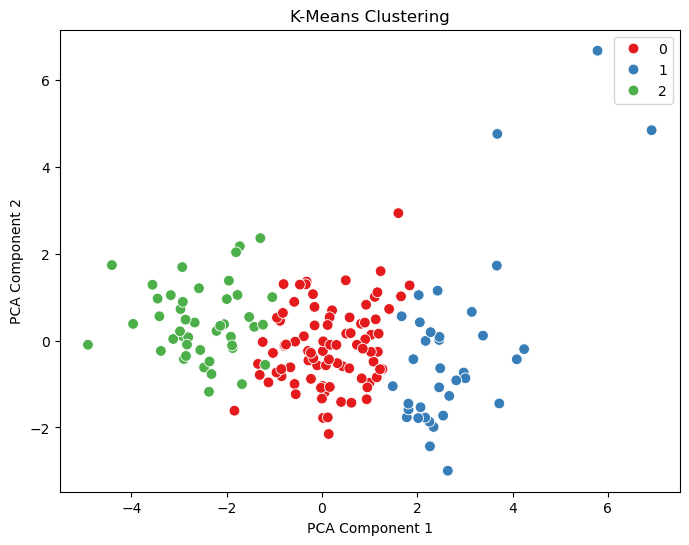

In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Применение K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
pred_kmeans = kmeans.labels_

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_kmeans, palette='Set1', s=60)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [99]:
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv('Country-data.csv')

# Удаление категориального признака
X = data.drop(columns=['country'])

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
from sklearn.cluster import KMeans

# Применение K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
pred_kmeans = kmeans.labels_

# Визуализация данных с метками кластеров
PCAplot3D(X_scaled, y_data=pred_kmeans)

In [101]:
print("K-Means метрики")
print()
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, kmeans.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, kmeans.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, kmeans.labels_)))

K-Means метрики

Calinski_harabasz_score: 177.19101511210894
Silhouette_score: 0.24606474545187046
Davies_bouldin_score: 0.9078740372857123


###  Agglomerative Clustering by Ward

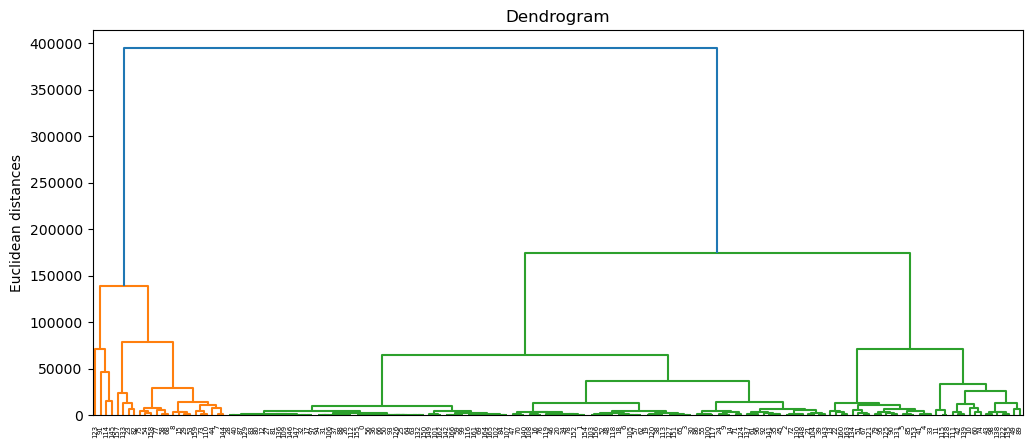

In [102]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [103]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

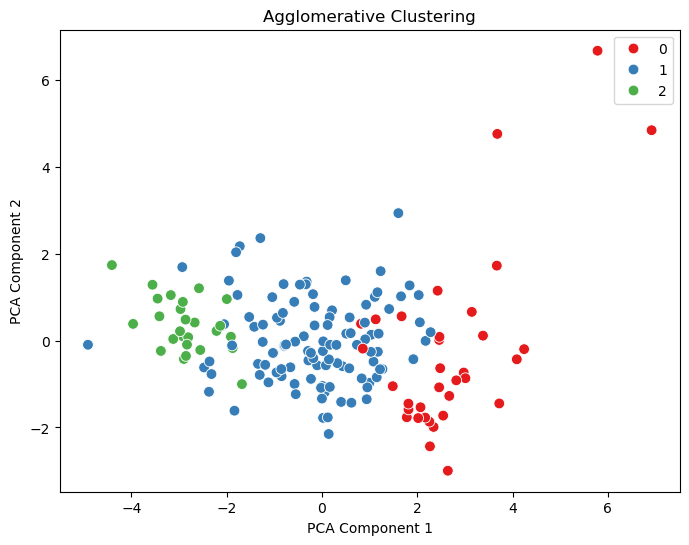

In [104]:
from sklearn.cluster import AgglomerativeClustering

# Применение агglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
pred_agg = agg_clustering.labels_

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_agg, palette='Set1', s=60)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [105]:
from sklearn.cluster import KMeans

# Применение K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
pred_kmeans = kmeans.labels_

# Визуализация данных с метками кластеров
PCAplot3D(X_scaled, y_data=pred_kmeans)

In [106]:

print("AgglomerativeClustering метрики")
print()
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, clustering_ward.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, clustering_ward.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, clustering_ward.labels_)))

AgglomerativeClustering метрики

Calinski_harabasz_score: 309.2944523367777
Silhouette_score: 0.5963166959187518
Davies_bouldin_score: 0.6707017006097632


### DBSCAN Clustering

In [107]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

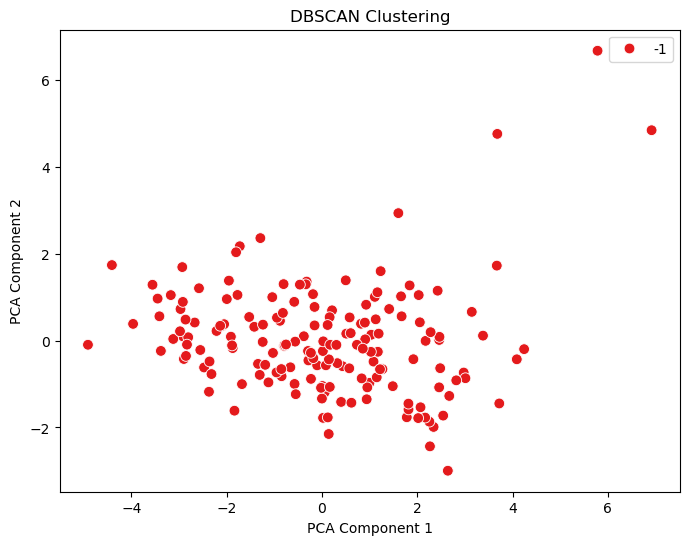

In [108]:
from sklearn.cluster import DBSCAN

# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
pred_dbscan = dbscan.labels_

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_dbscan, palette='Set1', s=60)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [109]:

print("SpectralClustering метрики")
print()
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, clustering_sp.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, clustering_sp.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, clustering_sp.labels_)))

SpectralClustering метрики

Calinski_harabasz_score: 4.732728653518016
Silhouette_score: 0.06719509858677335
Davies_bouldin_score: 6.310625533781457


In [110]:
# Визуализация данных без меток кластеров
PCAplot3D(X_scaled)

In [160]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## Вывод


Почему K-Means лучше всего подходит для нашего датасета:
Высокий Silhouette Score (0.24):

Silhouette Score измеряет, насколько хорошо объекты кластеризованы. Чем ближе значение к 1, тем лучше.

K-Means показал наивысший Silhouette Score среди всех алгоритмов.

Высокий Calinski-Harabasz Score (177.34):

Этот показатель измеряет соотношение между дисперсией внутри кластеров и между кластерами. Чем выше значение, тем лучше.

K-Means показал наивысший Calinski-Harabasz Score.

Низкий Davies-Bouldin Score (0.90):

Этот показатель измеряет среднее соотношение расстояний внутри кластеров и между кластерами. Чем ниже значение, тем лучше.

K-Means показал наименьший Davies-Bouldin Score.

Интерпретируемость:

K-Means создаёт чёткие, сферические кластеры, которые легко интерпретировать.

Это особенно полезно для анализа данных, где важно понимать структуру кластеров.

